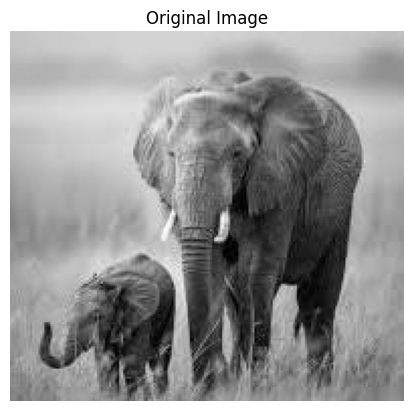

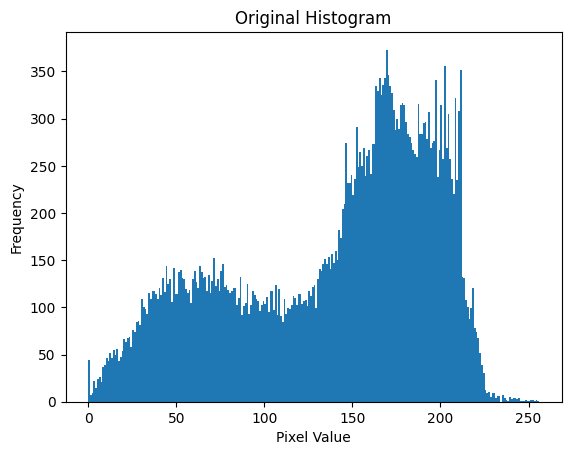

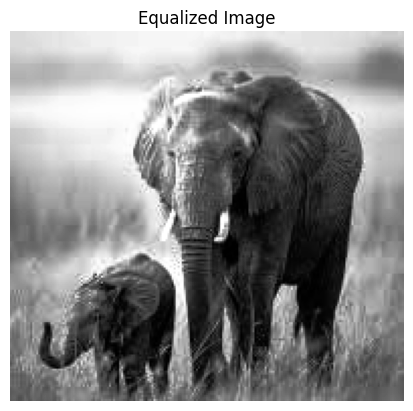

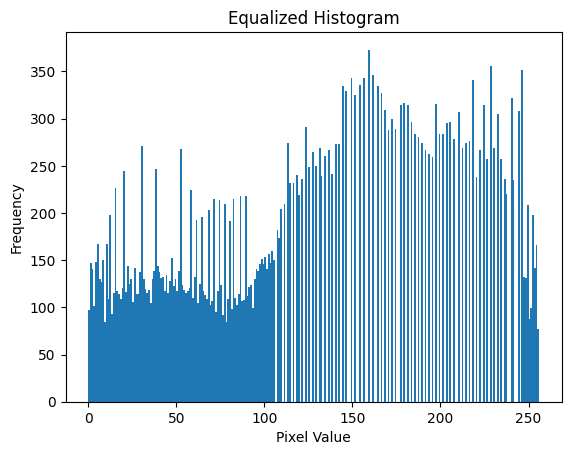

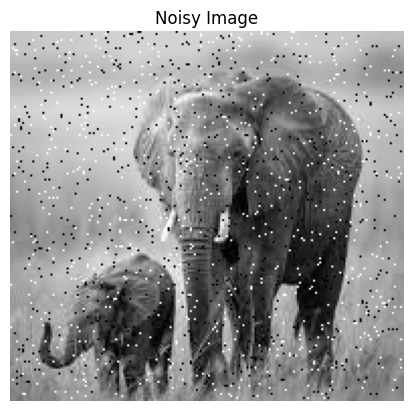

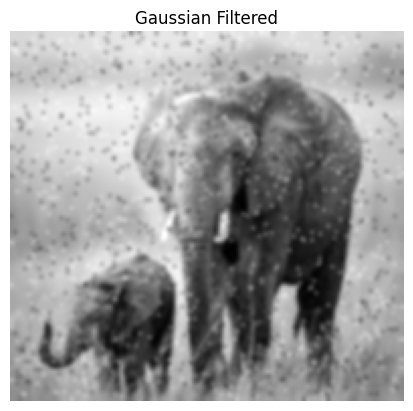

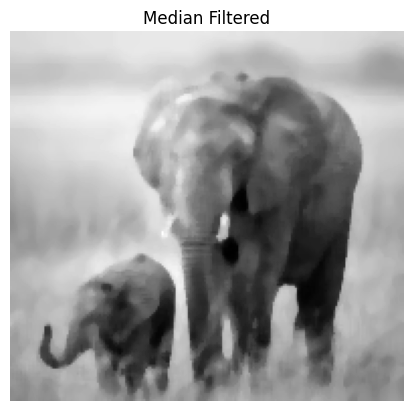

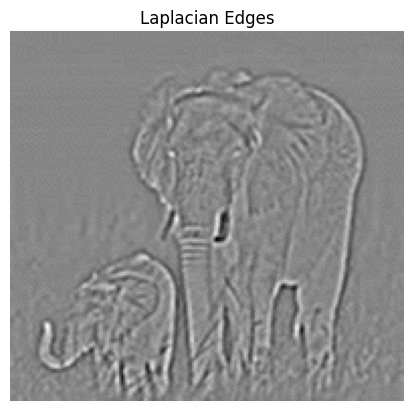

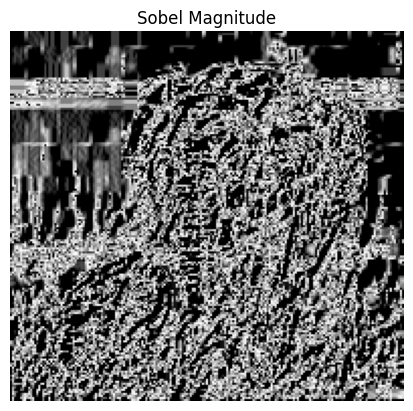

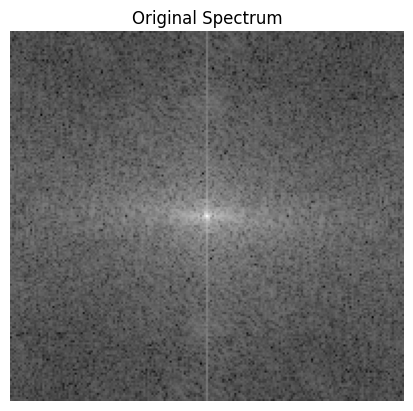

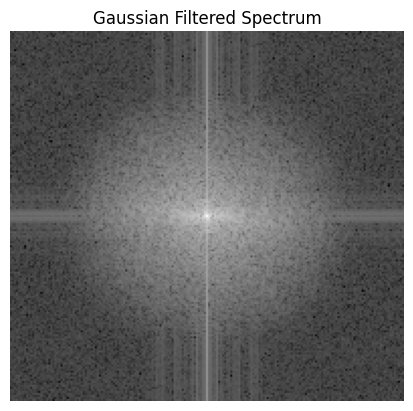

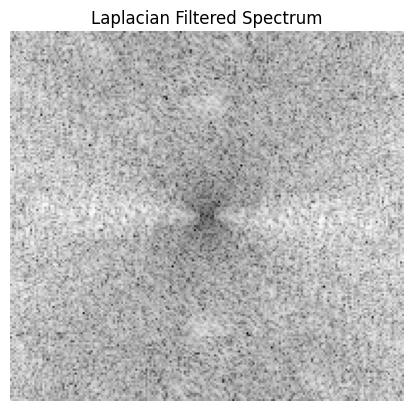

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title):
    plt.figure()
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

def show_image(title, image):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image = cv2.imread('Elephant.jpg', cv2.IMREAD_GRAYSCALE)
show_image('Original Image', image)
plot_histogram(image, 'Original Histogram')

equalized_img = cv2.equalizeHist(image)
show_image('Equalized Image', equalized_img)
plot_histogram(equalized_img, 'Equalized Histogram')

def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)
    
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

noisy_img = add_salt_pepper_noise(image, 0.02, 0.02)
show_image('Noisy Image', noisy_img)

gaussian_filtered = cv2.GaussianBlur(noisy_img, (5,5), 0)
median_filtered = cv2.medianBlur(noisy_img, 5)
show_image('Gaussian Filtered', gaussian_filtered)
show_image('Median Filtered', median_filtered)

gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)
laplacian_edges = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
show_image('Laplacian Edges', laplacian_edges)

def sobel_gradient(image):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    Gx = cv2.filter2D(image, -1, Kx)
    Gy = cv2.filter2D(image, -1, Ky)
    magnitude = np.sqrt(Gx**2 + Gy**2)
    return magnitude

sobel_mag = sobel_gradient(image)
show_image('Sobel Magnitude', sobel_mag)

def magnitude_spectrum(image, title):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

magnitude_spectrum(image, 'Original Spectrum')
magnitude_spectrum(cv2.GaussianBlur(image, (5,5), 0), 'Gaussian Filtered Spectrum')
magnitude_spectrum(cv2.Laplacian(image, cv2.CV_64F), 'Laplacian Filtered Spectrum')